<a href="https://colab.research.google.com/github/pallavibekal/CodeRepository/blob/main/Image_Classification_MLP_M4_01_Pallavi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objectives


* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition. 

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013. 

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.

In [ ]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip


### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

from tensorflow.keras.optimizers import SGD      
from keras.layers import Activation, Dense, Input, Flatten, Dropout, BatchNormalization   # using keras importing layers                                    
from keras.callbacks import EarlyStopping         

### Data Loading and Feature Extraction 

#### Get the features and labels of data

* Extract the features of the images
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   

In [ ]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.1.2


In [ ]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('/content/FullIJCNN2013/00/00000.ppm')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

PPM
RGB
(30, 30)


uint8
(30, 30, 3)


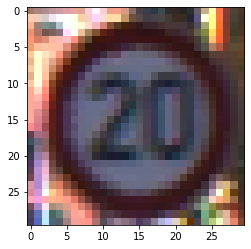

In [ ]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('/content/FullIJCNN2013/00/00000.ppm')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [ ]:
# load image and convert to and from NumPy array
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('/content/FullIJCNN2013/00/00000.ppm')
# convert image to numpy array
data = asarray(image)
# summarize shape
print(data.shape)
# create Pillow image
image2 = Image.fromarray(data)
# summarize image details
print(image2.format)
print(image2.mode)
print(image2.size)

(30, 30, 3)
None
RGB
(30, 30)


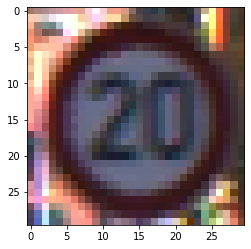

In [ ]:
pyplot.imshow(image2)
pyplot.show()

In [ ]:
#1. Extract the features of the images
#2. Extract labels of the images
#3. Resize the images to (30, 30) and convert to numpy 1-D array

data = []
flat_data = []
labels = []
classes = 43

for i in range(classes):
  if(i<=9):
    path = os.path.join(os.getcwd(),'FullIJCNN2013',str('0' + str(i)))
    images = os.listdir(path)
  else:
    path = os.path.join(os.getcwd(),'FullIJCNN2013',str(i))
    images = os.listdir(path)

  for j in images:
    try:
      image = Image.open(path + '/'+ j)
      image = image.resize((30,30))
      image = np.array(image)
      data.append(image)
      flat_data.append(image.flatten())
      labels.append(i)
    except:
      print("Error loading image")#Converting lists into numpy arrays bcoz its faster and takes lesser #memorydata = np.array(data)

# Convert to numpy array
data = np.array(data)
flat_data = np.array(flat_data)
labels = np.array(labels)


In [ ]:
print(data.shape,flat_data.shape)

(1213, 30, 30, 3) (1213, 2700)


In [ ]:
print(labels.shape)

(1213,)


#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [ ]:
data = np.array(data)/255
flat_data = preprocessing.normalize(flat_data)


In [ ]:
flat_data.shape

(1213, 2700)

### Train the MLP classifier on features 

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

### Tune the hyper-parameters 





* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Manually change and find the best parameters



In [ ]:
# Get two sets of trains and test for data plus flat data

X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2,random_state=42, shuffle=True)


X_train_flat, X_test_flat, Y_train_flat, Y_test_flat = train_test_split(flat_data,labels,test_size=0.2,random_state=42, shuffle=True)

In [ ]:
# 1 MLP Classifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_flat, Y_train_flat)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
Y_pred_MLP1 = clf.predict(X_test_flat)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Score-',accuracy_score(Y_pred_MLP1,Y_test))

Accuracy Score- 0.8641975308641975


In [ ]:
# 2 MLP Classifier
clf_MLP2 = MLPClassifier(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=200)

In [ ]:
clf_MLP2.fit(X_train_flat,Y_train_flat)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(64, 64, 64), random_state=1)

In [ ]:
Y_pred_MLP2=clf_MLP2.predict(X_test_flat)
print('Accuracy Score-',accuracy_score(Y_pred_MLP2,Y_test))

Accuracy Score- 0.7983539094650206


In [ ]:
# 3 MLP Classifier with gridsearch
from sklearn.model_selection import GridSearchCV
MLP_grid = MLPClassifier(max_iter=300)
parameter_space = {
    'hidden_layer_sizes': [(10,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(MLP_grid, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train_flat, Y_train_flat) 

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[2700]):
    model = Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation="softmax", **options))
        options = {}
    model.add(Dense(1, **options))
    optimizer = SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    # YOUR CODE HERE to return 'model'
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [ ]:
from scipy.stats import reciprocal 
param_distribs = {
    "n_hidden": [2, 4],
    "n_neurons": [10,100,300],
    "learning_rate": [0.1, 0.01, 0.003],
}

In [ ]:
X_train_flat_2, X_val_flat, Y_train_flat_2, Y_val_flat = train_test_split(X_train_flat,Y_train_flat,test_size=0.2,random_state=42, shuffle=True)

In [ ]:
X_train_flat_2.shape

(776, 2700)

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.01, 'n_hidden': 2, 'n_neurons': 10}

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train_flat_2, Y_train_flat_2, epochs=300,validation_data=(X_val_flat,Y_val_flat))
                  #callbacks=[keras.callbacks.EarlyStopping()] 
  


Streaming output truncated to the last 5000 lines.
Epoch 205/300
17/17 [==============================] - 0s 20ms/step - loss: 143.7912 - val_loss: 148.2197
Epoch 206/300
17/17 [==============================] - 0s 17ms/step - loss: 143.7872 - val_loss: 148.1839
Epoch 207/300
17/17 [==============================] - 0s 14ms/step - loss: 143.7948 - val_loss: 148.0129
Epoch 208/300
17/17 [==============================] - 0s 16ms/step - loss: 143.7271 - val_loss: 147.9552
Epoch 209/300
17/17 [==============================] - 0s 17ms/step - loss: 143.7474 - val_loss: 147.9929
Epoch 210/300
17/17 [==============================] - 0s 16ms/step - loss: 143.7302 - val_loss: 147.9881
Epoch 211/300
17/17 [==============================] - 0s 16ms/step - loss: 143.7342 - val_loss: 147.9260
Epoch 212/300
17/17 [==============================] - 0s 20ms/step - loss: 143.7408 - val_loss: 147.9098
Epoch 213/300
17/17 [==============================] - 0s 20ms/step - loss: 143.7410 - val_loss: 147.

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f8a72e4c290>,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.003],
                                        'n_hidden': [2, 4],
                                        'n_neurons': [10, 100, 300]})

In [ ]:
print('Best parameters found:\n', clf.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}

In [ ]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
y_true, y_pred = Y_test_flat , clf.predict(X_test_flat)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           1       0.70      0.88      0.78        16
           2       0.74      0.88      0.80        16
           3       0.50      0.50      0.50         6
           4       1.00      0.87      0.93        15
           5       0.78      0.50      0.61        14
           6       0.86      1.00      0.92         6
           7       0.89      0.89      0.89         9
           8       0.86      0.86      0.86        14
           9       1.00      1.00      1.00        11
          10       0.94      1.00      0.97        16
          11       0.85      0.92      0.88        12
          12       0.90      1.00      0.95        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         4
          18       0.67      1.00      0.80         6
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         3
          22       1.00      1.00      1.00         4
          23       0.40      0.50      0.44         4
          24       0.00      0.00      0.00         2
          25       0.67      0.80      0.73         5
          26       0.33      0.25      0.29         4
          28       0.67      1.00      0.80         2
          29       0.00      0.00      0.00         2
          30       1.00      1.00      1.00         2
          32       0.00      0.00      0.00         2
          33       1.00      1.00      1.00         3
          34       1.00      1.00      1.00         1
          35       0.88      1.00      0.93         7
          36       0.00      0.00      0.00         1
          38       0.90      1.00      0.95         9
          41       0.00      0.00      0.00         1
          42       0.67      0.67      0.67         3

    accuracy                           0.84       243
   macro avg       0.67      0.71      0.69       243
weighted avg       0.80      0.84      0.81       243

#### Try the different algorithms and compare the results with MLP classifier

### SVM Model Experiments

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [ ]:
model.fit(X_train_flat,Y_train_flat)


In [ ]:
model.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
svc = svm.SVC(C=100,gamma=0.001,kernel='rbf')

In [ ]:
model.fit(X_train_flat,Y_train_flat)


In [ ]:
Y_pred_svc=model.predict(X_test_flat)
print('Accuracy Score-',accuracy_score(Y_pred_svc,Y_test))


### Implement simple Neural Networks using keras 

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:

from tensorflow.keras.layers import Flatten, Dense
model = Sequential([
                    Flatten(input_shape=[30, 30,3]),
                    Dense(300, activation="relu"),
                    Dense(100, activation="relu"),
                    Dense(43, activation="softmax")
                    ])

In [ ]:
model.summary()

In [ ]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

In [ ]:
history = model.fit(X_train, Y_train, epochs=30, validation_data = (X_test, Y_test))

In [ ]:
# Visualize training and validation metrics
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
# set the vertical range to [0-1]
plt.gca().set_ylim(0, 1) 
plt.show()

In [ ]:
# predict the outcomes
y_predict = model.predict(X_test)
loss,score = model.evaluate(X_test, Y_test)
# displaying the score
print(score)

#### Try the same parameters used for MLP Classifier and build the keras model

In [ ]:
# {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive',
# 'solver': 'adam'}

In [ ]:
from tensorflow.keras.layers import Flatten, Dense
model_MLP = Sequential([
                    Flatten(input_shape=[30, 30,3]),
                    Dense(20, activation="tanh"),
                    Dense(20, activation="tanh"),
                    Dense(43, activation="softmax")
                    ])

In [ ]:
model_MLP.summary()

In [ ]:
# Compile model
model_MLP.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

In [ ]:
history = model_MLP.fit(X_train, Y_train, epochs=30, validation_data = (X_test, Y_test))

In [ ]:
# predict the outcomes
y_predict = model_MLP.predict(X_test)
loss,score = model_MLP.evaluate(X_test, Y_test)
# displaying the score
print(score)

#### Experiment using Dropout, Regularization and Batch Normalization

In [ ]:
model = keras.models.Sequential([
      keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=[30,30,3]),
      keras.layers.MaxPooling2D(pool_size=(2, 2)),
      keras.layers.Flatten(input_shape=(33,33)),
      keras.layers.Dense(units=256, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(units=43, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=30, validation_data = (X_test, Y_test))

In [ ]:
# predict the outcomes
y_predict = model.predict(X_test)
loss,score = model.evaluate(X_test, Y_test)
# displaying the score
print(score)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predict)

In [ ]:
y_predict

In [ ]:
def predict_samples(model,X_test,X_test_flat,classes):
    pred_sample=[]
    for i in range(0,10):
        pred_temp = model.predict(np.expand_dims(testing_data[i],axis=0)).round(2)
        pred_temp = np.argmax(pred_temp, axis = 1)
        pred_sample.append(pred_temp)
    
    # Visualizing our predicted samples
    print("Visualizing our predicted samples:")
    plt.figure(figsize=(20,9))
    j=1
    for img in range(0,10):
        plt.subplot(2,5,j)
        eachImg = cv2.imread(test_df['Path'][img])
        eachImg = cv2.cvtColor(eachImg,cv2.COLOR_BGR2GRAY)
        eachImg = eachImg/255
        plt.imshow(eachImg)
        plt.axis('off')
        plt.title('Actual:({}){} \nPredicted:({}){}'.format( test_df['Labels'][img],classes[test_df['Labels'][img]], pred_sample[img][0],classes[pred_sample[img][0]] ))
        j+=1
        
